In [2]:
import os
import sys
import pandas as pd
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.sandbox.stats.multicomp as mc
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [269]:
plt.rcParams["figure.figsize"]= 5, 10
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.set(font_scale=2)

In [270]:
tcam_df = pd.read_csv('../power_table_size.csv')
tcam_df = tcam_df.append(pd.read_csv('../sram_power_table_size.csv'), ignore_index=True)

[Text(0.5, 0, 'P4 table size'), Text(0, 0.5, 'Worst case power (W)')]

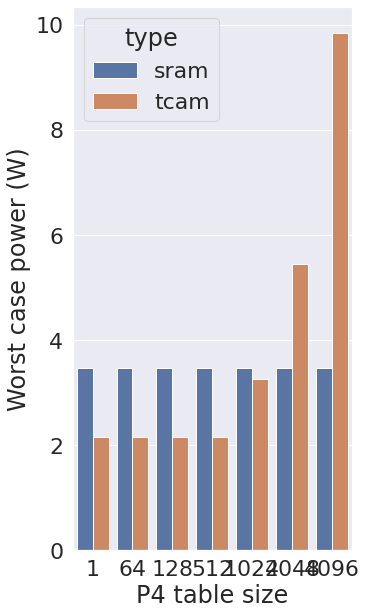

In [271]:
pt = sns.barplot(data=tcam_df, y='power', x='table_size', hue= 'type', hue_order=['sram', 'tcam'])
pt.set(xlabel="P4 table size", ylabel="Worst case power (W)")

In [6]:
tcam_kwdth_df = pd.read_csv('../power_table_size_k_wdth.csv')
tcam_kwdth_df = tcam_kwdth_df.append(pd.read_csv('../tcam_power_table_size_k_wdth.csv'), ignore_index=True)

In [7]:
tcam_kwdth_1_df = pd.read_csv('../sram_power_table_size_k_wdth_1.csv')
tcam_kwdth_1_df = tcam_kwdth_1_df.append(pd.read_csv('../tcam_power_table_size_k_wdth_1.csv'), ignore_index=True)

[Text(0.5, 0, 'P4 table key size (@ 1024 table entries)'),
 Text(0, 0.5, 'Worst case power (W)')]

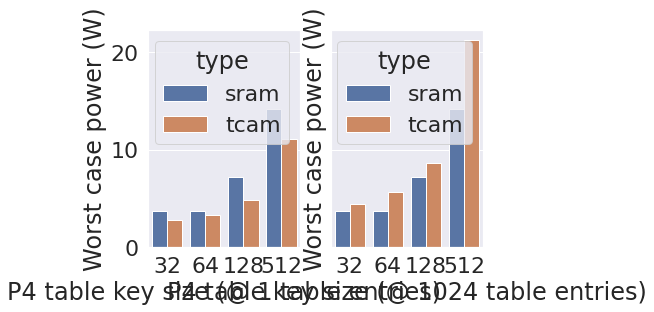

In [8]:
fig, axes = plt.subplots(1, 2, sharey=True)

plt1 = sns.barplot(data=tcam_kwdth_1_df, y='power', x='table_size', hue= 'type', hue_order=['sram', 'tcam'], ax=axes[0])

plt1.set(xlabel="P4 table key size (@ 1 table entries)", ylabel="Worst case power (W)")
plt2 = sns.barplot(data=tcam_kwdth_df, y='power', x='table_size', hue= 'type', hue_order=['sram', 'tcam'], ax=axes[1])
plt2.set(xlabel="P4 table key size (@ 1024 table entries)", ylabel="Worst case power (W)")

In [299]:
tcam_mat_df = pd.read_csv('../sram_power_table_size_mat.csv')
tcam_mat_df = tcam_mat_df.append(pd.read_csv('../tcam_power_table_size_mat.csv'), ignore_index=True)

[Text(0.5, 0, 'MAT used'), Text(0, 0.5, 'Worst case power (W)')]

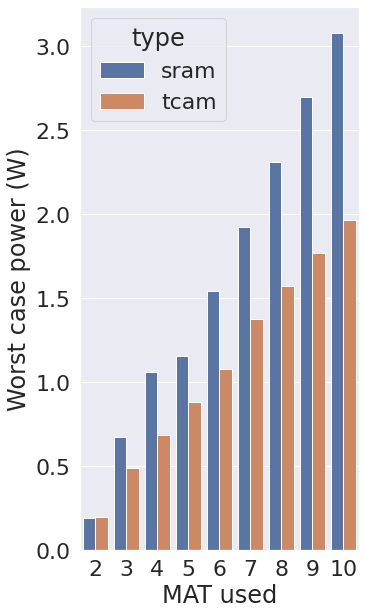

In [300]:
pt = sns.barplot(data=tcam_mat_df, y='power', x='table_size', hue= 'type', hue_order=['sram', 'tcam'])
pt.set(xlabel="MAT used", ylabel="Worst case power (W)")

# Research questions
* Can we measure this compiler output?
* Can we model the energy consumption?

# Further tests

* Netronome/ T4P4S
* Table sizes @ 100k, 1M table entries

# Measurement parameters
* Fan speed @ 30%
* No application running
* Idle @ all ports enabled
* 10% of 6.4 Tbps forwarding capacity / 1.6 Tbps per pipe
* 100% of 6.4 Tbps forwarding capacity / 1.6 Tbps per pipe

In [11]:
res_df = pd.DataFrame()
with open('tcam_results') as f:
    for i in f.readlines():
        res = re.search(r"(.*):\s(\d+)\s.*(\d{3,})\.(.\d+)", i.strip())
        tmp ={}
        if res is not None:
            tmp['run_stage'] = res.groups()[0]
            tmp['size'] = int(res.groups()[1])
            tmp['power'] = float(str(res.groups()[2]) + '.' + str(res.groups()[3]))
            res_df = res_df.append(tmp, ignore_index=True)

[Text(0.5, 0, 'TCAM table size'), Text(0, 0.5, 'Measured power (W)')]

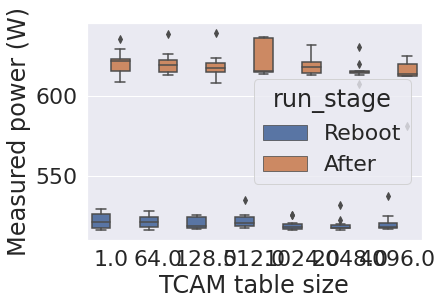

In [12]:
pt = sns.boxplot(data=res_df, x='size', y='power', hue='run_stage')
pt.set(xlabel="TCAM table size", ylabel="Measured power (W)")

In [13]:
sram_res_df = pd.DataFrame()
with open('sram_results') as f:
    for i in f.readlines():
        res = re.search(r"(.*):\s(\d+)\s.*(\d{3,})\.(.\d+)", i.strip())
        tmp ={}
        if res is not None:
            tmp['run_stage'] = res.groups()[0]
            tmp['size'] = int(res.groups()[1])
            tmp['power'] = float(str(res.groups()[2]) + '.' + str(res.groups()[3]))
            sram_res_df = sram_res_df.append(tmp, ignore_index=True)

[Text(0.5, 0, 'TCAM table size'), Text(0, 0.5, 'Measured power (W)')]

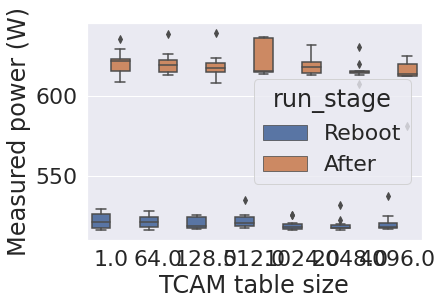

In [14]:
pt = sns.boxplot(data=res_df, x='size', y='power', hue='run_stage')
pt.set(xlabel="TCAM table size", ylabel="Measured power (W)")

[Text(0.5, 0, 'SRAM table size'), Text(0, 0.5, 'Measured power (W)')]

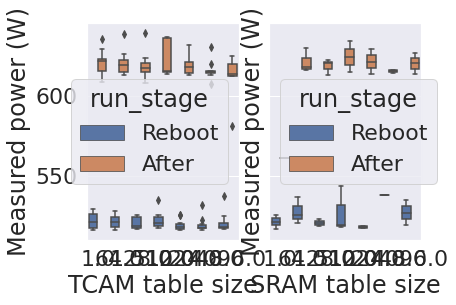

In [15]:
fig, axes = plt.subplots(1, 2, sharey=True)

plt1 = sns.boxplot(data=res_df, x='size', y='power', hue='run_stage', hue_order=['Reboot', 'After'], ax=axes[0])
plt1.set(xlabel="TCAM table size", ylabel="Measured power (W)")

plt2 = sns.boxplot(data=sram_res_df, x='size', y='power', hue='run_stage', hue_order=['Reboot', 'After'], ax=axes[1])
plt2.set(xlabel="SRAM table size", ylabel="Measured power (W)")

In [16]:
sram_mat_res_df = pd.DataFrame()
with open('sram_mat_results') as f:
    for i in f.readlines():
        res = re.search(r"(.*):\s(\d+)\s.*(\d{3,})\.(.\d?)", i.strip())
        tmp ={}
        if res is not None:
            tmp['run_stage'] = res.groups()[0]
            tmp['size'] = int(res.groups()[1])
            tmp['power'] = float(str(res.groups()[2]) + '.' + str(res.groups()[3]))
            sram_mat_res_df = sram_mat_res_df.append(tmp, ignore_index=True)       

In [17]:
port_df = pd.DataFrame()
with open('traffic_correct') as f:
    for i in f.readlines():
        res = re.search(r"(.*):\s(\d+)\s.*(\d{3,})\.(.\d?)", i.strip())
        tmp ={}
        if res is not None:
            tmp['run_stage'] = res.groups()[0]
            tmp['size'] = int(res.groups()[1])
            tmp['power'] = float(str(res.groups()[2]) + '.' + str(res.groups()[3]))
            port_df = port_df.append(tmp, ignore_index=True)

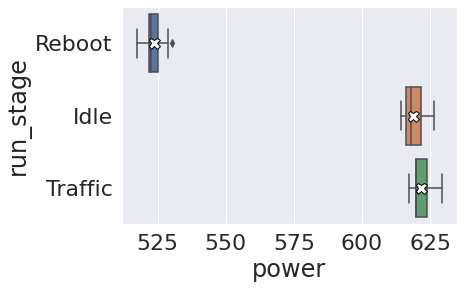

In [18]:
ax = sns.boxplot(data=port_df, orient='h', y="run_stage", x="power", showmeans=True, meanprops={"marker":"X",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"11"},
                 order = ['Reboot', 'Idle', 'Traffic']
                )

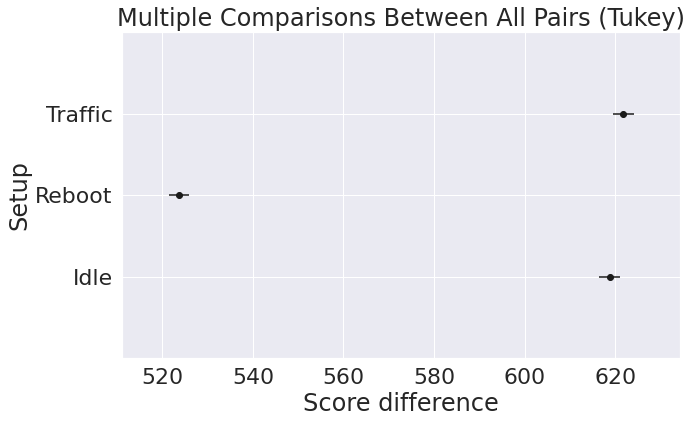

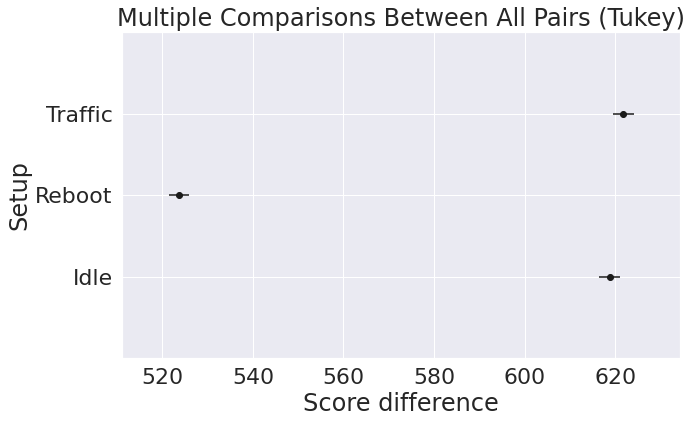

In [19]:
comp = mc.MultiComparison(port_df['power'], port_df['run_stage'])
post_hoc_res = comp.tukeyhsd()

post_hoc_res.plot_simultaneous(ylabel= "Setup", xlabel= "Score difference")

In [20]:
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Idle,Reboot,-95.12,-0.0,-99.7297,-90.5103,True
Idle,Traffic,2.9878,0.2574,-1.622,7.5975,False
Reboot,Traffic,98.1078,-0.0,93.498,102.7175,True


In [138]:
def parse_energy_out(file):
    traffic_df = pd.DataFrame()
    pt = 0
    if '1' in file:
        pt = '1'
    if '3' in file:
        pt = '3'

    with open(file) as f:
        for i in f.readlines():
            res = re.search(r"(.*):\s(\d+)\s.*(\d{3,})\.(.\d?)", i.strip())
            tmp ={}
            if res is not None:
                if res.groups()[0] == 'Traffic_100':
                    tmp['run_stage'] = '100%'
                elif res.groups()[0] == 'Traffic_30':
                    tmp['run_stage'] = '30%'
                else:
                    tmp['run_stage'] = res.groups()[0]
                tmp['size'] = int(res.groups()[1])
                tmp['power'] = float(str(res.groups()[2]) + '.' + str(res.groups()[3]))
                tmp['Traffic'] = str(pt) + '00G'
                traffic_df = traffic_df.append(tmp, ignore_index=True)
                
    return traffic_df

In [312]:
def parse_energy_out(file):
    traffic_df = pd.DataFrame()
    pt = 0
    if '1' in file:
        pt = '100G' 
    if '3' in file:
        pt = '300G'
    if 'sram' in file:
        pt = 'sram'    
    if 'tcam' in file:
        pt = 'tcam'
    tmp = {}
    index = 0
    with open(file) as f:
        for i in f.readlines():
            res = re.search(r"(.*):\s(\d+)\s.*(\d{3,})\.(.\d?)", i.strip())
            if res is not None:

                index = int(res.groups()[1])
                if index not in tmp:
                    tmp[index] = {}
                tmp[index][res.groups()[0]] =  float(str(res.groups()[2]) + '.' + str(res.groups()[3]))
                tmp[index]["Var"] =  pt
    traffic_df = pd.DataFrame.from_dict(tmp, orient='index')
    return traffic_df

In [286]:
traffic_df = parse_energy_out('traffic_with_1_cables')
traffic_df = traffic_df.append(parse_energy_out('traffic_with_3_cables'))

In [287]:
traffic_df['P_100'] = traffic_df['Traffic_100'] - traffic_df['Idle']
traffic_df['P_30'] = traffic_df['Traffic_30'] - traffic_df['Idle']

In [256]:
x

,Traffic,variable,value
0,100G,P_100,3.02
1,100G,P_100,2.14
2,100G,P_100,3.55
3,100G,P_100,3.02
4,100G,P_100,2.37
5,100G,P_100,3.52
6,100G,P_100,2.93
7,100G,P_100,3.35
8,100G,P_100,4.71
9,100G,P_100,1.87


In [288]:
traffic_df.melt(id_vars="Traffic", value_vars=["P_100", "P_30", "Idle"])

,Traffic,variable,value
0,100G,P_100,3.02
1,100G,P_100,2.14
2,100G,P_100,3.55
3,100G,P_100,3.02
4,100G,P_100,2.37
5,100G,P_100,3.52
6,100G,P_100,2.93
7,100G,P_100,3.35
8,100G,P_100,4.71
9,100G,P_100,1.87


<AxesSubplot:xlabel='variable', ylabel='value'>

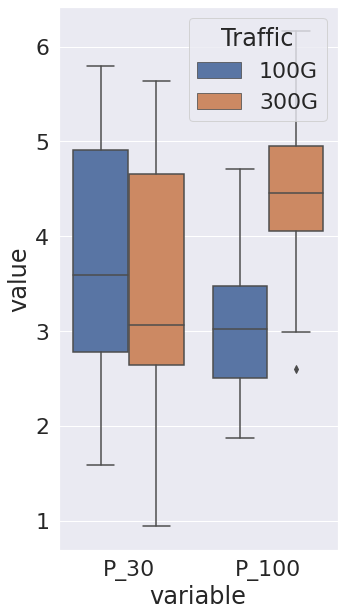

In [289]:
sns.boxplot(
    data=traffic_df.melt(id_vars="Traffic", value_vars=["P_30", "P_100"]),
    hue="Traffic",
    y="value",
    x="variable")

In [275]:
fig = sns.boxplot(data=traffic_df.transpose(),
            showmeans=True,
            meanprops={"marker":"X",
                                   "markerfacecolor":"white", 
                                   "markeredgecolor":"black",
                                    "markersize":"11"},
           )
fig.set(ylabel='Line utilisation',
        xlabel='Power (W)'
       )
plt.savefig('port_traffic_1_3.png')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [197]:
model = ols('power ~ run_stage', data=traffic_df).fit()
aov_table = sm.stats.anova_lm(model ,typ=2)
aov_table

PatsyError: Error evaluating factor: NameError: name 'power' is not defined
    power ~ run_stage
    ^^^^^

In [25]:
comp = mc.MultiComparison(traffic_df['power'], traffic_df['run_stage'])
post_hoc_res = comp.tukeyhsd()

In [26]:
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
100%,30%,-0.2125,0.9884,-1.4265,1.0015,False
100%,Between,-1.014,0.1467,-2.228,0.2,False
100%,Idle,-3.7555,0.0,-4.9695,-2.5415,True
100%,Reboot,-107.4792,-0.0,-108.7091,-106.2493,True
30%,Between,-0.8015,0.3592,-2.0155,0.4125,False
30%,Idle,-3.543,0.0,-4.757,-2.329,True
30%,Reboot,-107.2667,-0.0,-108.4966,-106.0368,True
Between,Idle,-2.7415,0.0,-3.9555,-1.5275,True
Between,Reboot,-106.4652,-0.0,-107.6951,-105.2353,True
Idle,Reboot,-103.7237,-0.0,-104.9536,-102.4938,True


In [30]:
traffic_df

,run_stage,size,power,Traffic
0,Reboot,1.0,526.13,100G
1,Idle,1.0,629.42,100G
2,100%,1.0,632.44,100G
3,Between,1.0,633.84,100G
4,30%,1.0,634.55,100G
...,...,...,...,...
45,Reboot,10.0,526.33,300G
46,Idle,10.0,629.83,300G
47,100%,10.0,635.98,300G
48,Between,10.0,634.24,300G


In [37]:
traffic_df[traffic_df['run_stage'] == 'Idle']['power']

1     629.42
6     630.27
11    631.25
15    631.01
20    628.77
25    631.78
30    628.97
35    630.62
40    633.24
45    629.82
1     630.47
6     630.48
11    633.35
16    632.15
21    630.27
26    631.65
31    633.38
36    630.50
41    633.16
46    629.83
Name: power, dtype: float64

In [39]:
traffic_df[traffic_df['run_stage'] == '100%']['power']

2     632.44
7     632.41
12    634.80
16    632.88
21    631.79
26    634.15
31    632.49
36    633.55
41    636.59
46    634.53
2     636.63
7     634.93
12    636.34
17    637.26
22    634.76
27    636.12
32    637.39
37    634.70
42    635.76
47    635.98
Name: power, dtype: float64

In [423]:
mat_df = parse_energy_out('mat_sram')
mat_df = mat_df.append(parse_energy_out('mat_tcam'))
mat_df['P_100'] = mat_df['Traffic_100'] - mat_df['Reboot'].melt()
mat_df['P_30'] = mat_df['Traffic_30'] - mat_df['Reboot']

In [438]:
mat_df.melt(id_vars="Var", value_vars=["P_30", "P_100"])

,Var,variable,value
0,sram,P_30,101.16
1,sram,P_30,100.30
2,sram,P_30,99.23
3,sram,P_30,99.68
4,sram,P_30,99.13
5,sram,P_30,NaN
6,tcam,P_30,100.32
7,tcam,P_30,99.92
8,tcam,P_30,97.13
9,tcam,P_30,98.25


<AxesSubplot:xlabel='variable', ylabel='value'>

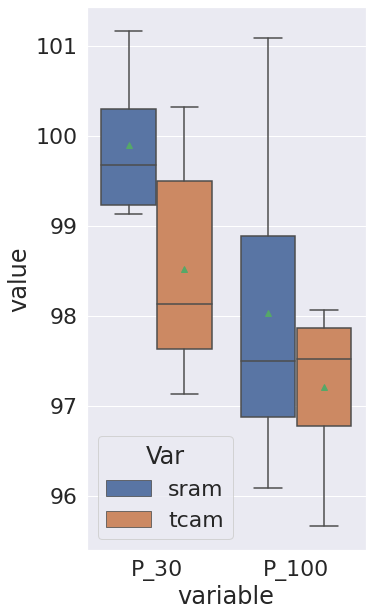

In [442]:
sns.boxplot(
    data=mat_df.melt(id_vars="Var", value_vars=["P_30", "P_100"]),
    hue="Var",
    x="variable",
    y="value",
    showmeans=True
)